## example1
### 대출자들의 채무 상환 관련 데이터 - 상환 여부 예측

In [2]:
# 데이터 구성 : Series, DataFrame
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family = "Malgun Gothic")

# export_graphviz : 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz

# graphviz : 나무 구조 시각화 (.dot확장자 파일 불러오기 등)
import graphviz

# 데이터 분할 : train, test
from sklearn.model_selection import train_test_split # train set / test set 분리

# 분류 Random Forest
from sklearn.ensemble import RandomForestClassifier

# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 모델 성능 평가
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv("data/HMEQ.csv", engine = "python")
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


### 데이터 설명
* 척도 : Binary
* BAD[이산형, Binary] : 1-대출 채무 불이행 / 0-상환 대출
* LOAN[연속형, interval] : 대출 요청 금액
* MORTDUE[연속형, interval] : 기존 모기지 금액
* VALUE[연속형, interval] : 현재 자산
* REASON[이산형, Binary] : 대출 목적(DebtCon-부채 정리,HomeImp-주택 개량)
* JOB[범주형, Nominal] : 6가지 직업 분류
* YOJ[연속형, interval] : 연차
* DEROG[연속형, interval] : 주요 손실보고
* DELINQ[연속형, interval] : 연체 신용 한도
* CLAGE[연속형, interval] : 최장 계좌 연속월
* NINQ[연속형, interval] : 최근 신용 한도
* CNLO[연속형, interval] : 신용 한도의 수
* DEBTINC[연속형, interval] : 부채 비율

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      3748 non-null   int64  
 1   LOAN     3748 non-null   int64  
 2   MORTDUE  3748 non-null   int64  
 3   VALUE    3734 non-null   float64
 4   REASON   3748 non-null   object 
 5   JOB      3667 non-null   object 
 6   YOJ      3543 non-null   float64
 7   DEROG    3748 non-null   int64  
 8   DELINQ   3718 non-null   float64
 9   CLAGE    3711 non-null   float64
 10  NINQ     3692 non-null   float64
 11  CLNO     3748 non-null   int64  
 12  DEBTINC  3748 non-null   float64
dtypes: float64(6), int64(5), object(2)
memory usage: 380.8+ KB


In [5]:
# Null 값 확인
df.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [6]:
# 중앙값으로 결측값 대체
df.fillna(df.median(), inplace = True)
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [7]:
df.isnull().sum()

BAD         0
LOAN        0
MORTDUE     0
VALUE       0
REASON      0
JOB        81
YOJ         0
DEROG       0
DELINQ      0
CLAGE       0
NINQ        0
CLNO        0
DEBTINC     0
dtype: int64

In [8]:
# get_dummies : 데이터의 문자형 변수에 대한 더미 변수 생성
df_dummy = pd.get_dummies(df)
df_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [9]:
df_y = df_dummy['BAD']
df_x = df_dummy.drop('BAD', axis = 1, inplace = False)

In [10]:
# train set / test set 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1234)
print("train data size:{}".format(df_train_x.shape))
print("test data size:{}".format(df_test_x.shape))
df_train_x.head()

train data size:(2623, 18)
test data size:(1125, 18)


,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
3164,27600,103898,130784.0,11.0,0,0.0,147.128398,0.0,29,42.009814,1,0,0,1,0,0,0,0
3314,30200,80951,116160.0,19.0,4,0.0,130.360362,0.0,58,50.352999,1,0,0,0,0,1,0,0
93,5700,74172,79846.0,0.0,0,0.0,157.009775,0.0,28,47.415229,1,0,0,0,0,1,0,0
1456,14900,22245,31531.0,7.0,0,0.0,91.074218,0.0,16,21.620580,1,0,0,1,0,0,0,0
3327,30500,57516,103086.0,3.0,0,0.0,166.199527,2.0,24,37.814089,1,0,0,1,0,0,0,0


## 모델 생성 - 기본 옵션으로 모델 생성

In [11]:
# 랜덤 포레스트 모델 생성 : RandomForestClassifier
rf_uncustomized = RandomForestClassifier(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))

# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.944


### ㄴ 모델 정확도는 train 100%, test 94.4%로 모델은 train 데이터에 부분적으로 과대적합

In [12]:
rf_uncustomized

RandomForestClassifier(random_state=1234)

## 모델 Parameter 조정
### - n_estimators : 트리 수 변경에 따른 모델 성능

In [14]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy=[]

# n_estimators : 트리 수 변경 : 1~150
para_n_tree = [n_tree * 10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_n= pd.DataFrame()
df_accuracy_n['n_estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy 

# 모델 정확도 확인
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.994,0.941
1,20,0.998,0.945
2,30,0.999,0.945
3,40,1.000,0.944
4,50,1.000,0.944
5,60,1.000,0.944
6,70,1.000,0.944
7,80,1.000,0.944
8,90,1.000,0.944
9,100,1.000,0.944


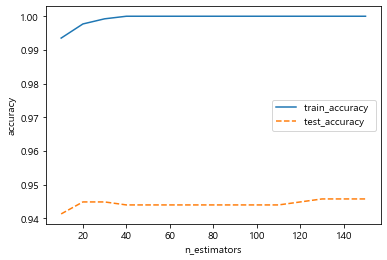

In [15]:
# 모델 정확도 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle = '-', label = 'train_accuracy ')
plt.plot(para_n_tree, test_accuracy, linestyle = '--', label = 'test_accuracy ')
plt.ylabel("accuracy")
plt.xlabel("n_estimators")
plt.legend()

#### ㄴ 생성하는 결정 트리 수 증가에 따라 모델의 정확도는 증가하며 Train/Test 데이터의 성능 변화를 고려해 40 선택, Test 데이터의 성능 변화를 고려해 60을 선택할 수 있음(단, Train 데이터의 성능 변화가 없음)
#### OOB를 이용한 적정 나무 확인 가능

## 모델 Parameter 조정
### - n_estimators : 트리 수 변경에 따른 모델 oob error 변화

In [17]:
# error 저장 리스트
oob_error = []

for v_n_estimator in range(1, 151):
    rf = RandomForestClassifier(n_estimators = v_n_estimator, oob_score = True,
                               random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1-rf.oob_score_)

c:\anaconda3\envs\posco\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\anaconda3\envs\posco\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
c:\anaconda3\envs\posco\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\anaconda3\envs\posco\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
c:\anaconda3\envs\posco\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably me

Text(0.5, 0, 'n_estimators')

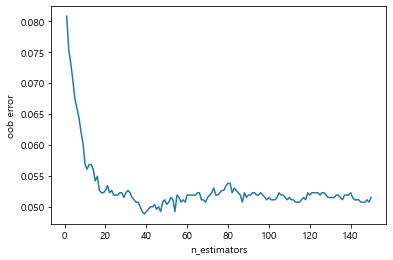

In [18]:
# 그래프로 표현
plt.plot(range(1, 151), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

#### ㄴ 생성하는 결정 트리 수 증가에 따라 모델의 정확도는 증가하며(OOB Error는 감소), 모델의 특성을 고려해 100 선택(자료가 많은 경우 트리 수를 늘릴 수 있음)
#### 앞의 결과와 종합해 40 선택 가능

In [19]:
# 트리 수 지정
n_estimators = 100

## 모델 Parameter 조정 
### - max_depth : 최대 깊이 변경에 따른 모델 성능

In [20]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy=[]

# max_depth : 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth, n_estimators = 100,
                                random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth= pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy 

# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.908,0.908
1,2,0.912,0.910
2,3,0.932,0.928
3,4,0.933,0.930
4,5,0.936,0.930
5,6,0.941,0.932
6,7,0.945,0.934
7,8,0.948,0.935
8,9,0.952,0.935
9,10,0.956,0.937


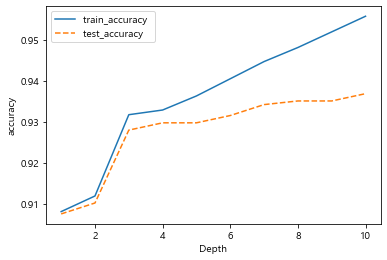

In [21]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = '-', label = 'train_accuracy ')
plt.plot(para_depth, test_accuracy, linestyle = '--', label = 'test_accuracy ')
plt.ylabel("accuracy")
plt.xlabel("Depth")
plt.legend()

#### ㄴ 최대 깊이 증가에 따라 모델의 정확도는 증가하며 Train/Test 데이터의 성능 변화를 고려해 4 선택

In [22]:
# 최대 깊이 지정
max_depth = 4

## 모델 Parameter 조정 
### - min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능

In [23]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy=[]

# min_samples_split : 분할하기 위한 노드의 최소 샘플 수
para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split = v_min_samples_split, max_depth = 4, 
                                n_estimators = 100, random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split= pd.DataFrame()
df_accuracy_split['MinSamplesSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy 

# 모델 정확도 확인
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.933,0.929
1,20,0.933,0.929
2,30,0.932,0.929
3,40,0.933,0.929
4,50,0.932,0.929
5,60,0.932,0.929
6,70,0.932,0.928
7,80,0.932,0.928
8,90,0.932,0.928
9,100,0.932,0.928


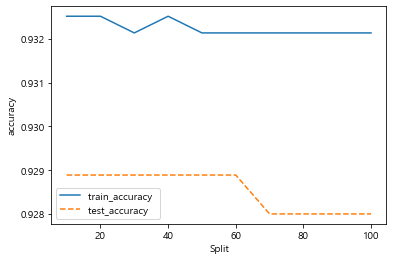

In [24]:
# 모델 정확도 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = '-', label = 'train_accuracy ')
plt.plot(para_split, test_accuracy, linestyle = '--', label = 'test_accuracy ')
plt.ylabel("accuracy")
plt.xlabel("Split")
plt.legend()

#### ㄴ 분리 노드의 최소 자료 수 증가에 따라 모델의 정확도는 감소하나 Test 데이터의 성능 변화를 고려하면 70까지는 영향이 없으며 80은 자료 수가 커서 특정 값을 지정하지 않음

## 모델 Parameter 조정
### - min_samples_leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [25]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy=[]

# min_samples_leaf : 분할하기 위한 노드의 최소 샘플 수
para_leaf = [n_leaf * 10 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf, 
                                max_depth = 4, n_estimators = 100, random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf= pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy 

# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.929,0.928
1,20,0.927,0.925
2,30,0.927,0.924
3,40,0.920,0.916
4,50,0.908,0.908
5,60,0.908,0.908
6,70,0.908,0.908
7,80,0.908,0.908
8,90,0.908,0.908
9,100,0.908,0.908


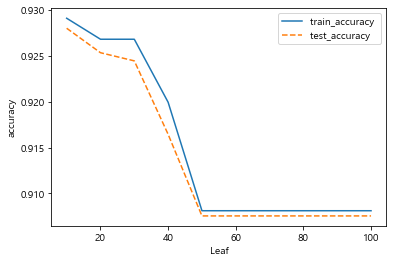

In [26]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = '-', label = 'train_accuracy ')
plt.plot(para_leaf, test_accuracy, linestyle = '--', label = 'test_accuracy ')
plt.ylabel("accuracy")
plt.xlabel("Leaf")
plt.legend()

#### ㄴ 잎사귀 노드 최소 자료 수 증가에 따라 모델의 정확도는 감소하며 Train/Test 데이터의 성능 변화를 고려해 20 선택

In [27]:
# 잎사귀 노드의 최소 자료 수 지정
min_samples_leaf = 20

## 결론 도출
### - 최종 모델 선택

In [28]:
# 최종 모델
rf_final = RandomForestClassifier(min_samples_leaf = 20, max_depth = 4, n_estimators = 100,
                                 random_state = 1234)
rf_final.fit(df_train_x, df_train_y)

# 평가
y_pred = rf_final.predict(df_test_x)

# train 데이터 셋 정확도
print("Accuracy on training set: {0:.3f}\n".format(rf_final.score(df_train_x, df_train_y)))

# test 데이터 셋 정확도
print("Accuracy on test set: {0:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))

# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.927

Accuracy on test set: 0.925

Confusion matrix: 
[[1021    0]
 [  84   20]]


### ㄴ Train/Test 데이터의 정분류율이 비슷한 수준(92.7%)으로 안정적인 모델임을 확인할 수 있음

## 결론 도출
### - feature_imporances_ : 설명변수의 중요도

In [30]:
# 변수명
v_feature_name = df_train_x.columns

# rf.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.477
5,DELINQ,0.174
4,DEROG,0.066
6,CLAGE,0.060
7,NINQ,0.059
8,CLNO,0.051
0,LOAN,0.039
2,VALUE,0.026
3,YOJ,0.014
1,MORTDUE,0.013


Text(0, 0.5, '설명변수')

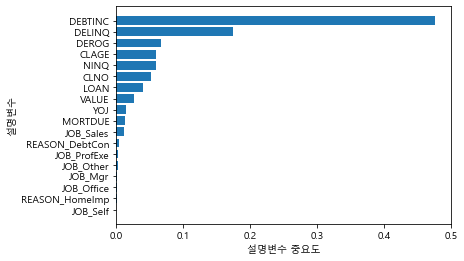

In [31]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))

plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

#### 중요 설명변수 : 트리 생성 시 부채비율(DEBTINC), 연체된 신용 한도의 수(DELINQ) 순으로 영향이 크다고 할 수 있음
#### 단, 계산된 변수 중요도 값이 낮거나 0이더라도 선택되는 훈련 데이터에 따라 중요도가 변경될 수 있음

## 모델 Parameter 조정 - 추가
### - GridSearchCV를 이용한 최적 parameter 찾기

In [32]:
estimator = RandomForestClassifier()

# 구하고자 하는 parameter와 범위
param_grid = {"max_depth": para_depth, "min_samples_leaf" : para_leaf}

# 정확도가 높은 최적 parameter 찾기
grid_rf = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs = -1)
grid_rf.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter model: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
RandomForestClassifier(max_depth=8, min_samples_leaf=10)

best parameter model: 
{'max_depth': 8, 'min_samples_leaf': 10}

best score: 
0.93


- 최대 깊이(max_depth) = 8, 잎사귀의 최소 샘플 수(min_samples_leaf) = 10
- **-> 정확도 가장 높음(0.93)**